# Exploratory Data Analysis - Haberman Dataset

Data Set Description:The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

## Number of data points: 306

## Number of Attributes  :   4 (including the class attribute)

## Attribute Information :
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year

## Missing Attribute Values: None

In [5]:
#importing all required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Reading csv file data in data frame
hbman = pd.read_csv("./haberman.csv")

In [6]:
# (Q) how many data-points and features?
print(hbman.shape)

(306, 4)


In [7]:
#(Q) What are the column names in our dataset?
print(hbman.columns)

Index(['Age', 'Op_Year', 'axil_nodes', 'Surv_status'], dtype='object')


In [8]:
hbman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Age          306 non-null    int64
 1   Op_Year      306 non-null    int64
 2   axil_nodes   306 non-null    int64
 3   Surv_status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


## All values are not null so dataset is cleaned , also there are no missing values

In [9]:
#(Q) How many data points for each class are present? 
#(or) How many people survived for 5+ years and how many died in 5 years ?
hbman["Surv_status"].value_counts()

1    225
2     81
Name: Surv_status, dtype: int64

## 1(Yes) - 225 people survived for 5 + years
## 2( No) - 81 people died in 5 year

In [10]:
print(str(225/305)+"% People Survived")
print(str(81/305)+"% People not Survived")

0.7377049180327869% People Survived
0.26557377049180325% People not Survived


In [11]:
hbman.describe()

,Age,Op_Year,axil_nodes,Surv_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


# Observations:

## Women at age of 52 are more likely to have breast cancer .
## 25% Women had 0 positive axillary nodes detected .
## 50% Women had 1 positive axillary nodes detected .
## 75% Women had 4 positive axillary nodes detected .
## 0.73% People Survived and 0.26% People not Survived
## So the dataset is a bit unbalanced as 73% data is classified in one class 

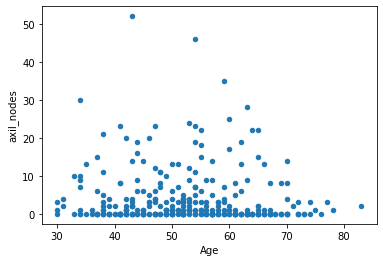

In [12]:
hbman.plot(kind='scatter',x='Age',y='axil_nodes')
#hbman.plot.line(x=None,y=4)
## 75% women had less than 4 positive axillary nodes detected .

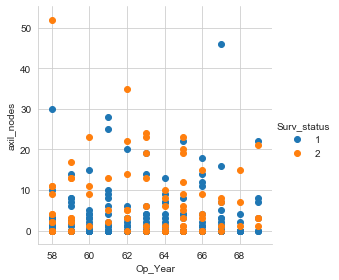

In [14]:
sns.set_style("whitegrid")
sns.FacetGrid(hbman,hue='Surv_status',height=4) \
    .map(plt.scatter,"Op_Year","axil_nodes") \
    .add_legend();

plt.show();

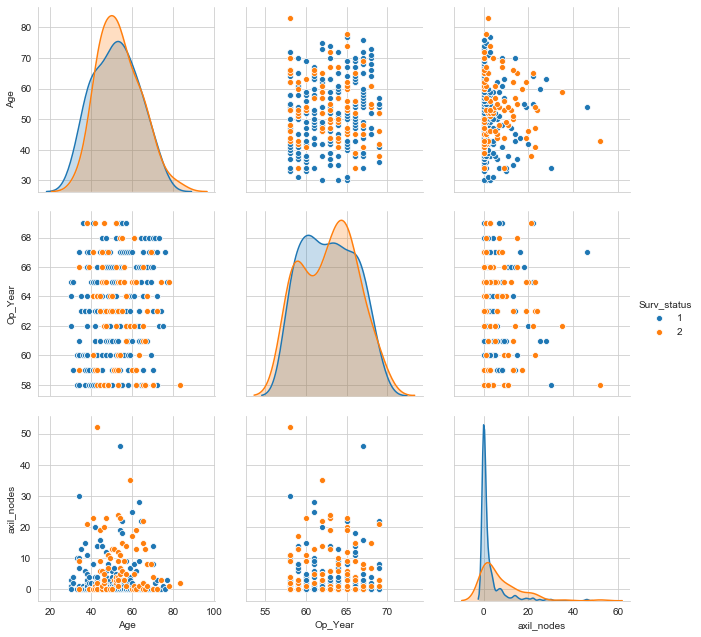

In [15]:
#plt.close();
sns.set_style("whitegrid")
sns.pairplot(hbman,hue='Surv_status',height=3 , x_vars={'Age', 'Op_Year', 'axil_nodes'},y_vars={'Age', 'Op_Year', 'axil_nodes'})
plt.show()

## Diagonals are PDFs for columns

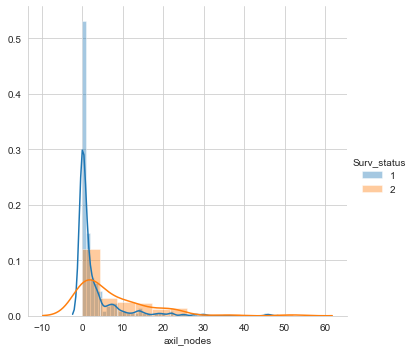

In [12]:
plt.close();
sns.FacetGrid(hbman,hue='Surv_status',height=5) \
    .map(sns.distplot,"axil_nodes") \
    .add_legend()
    
plt.show()

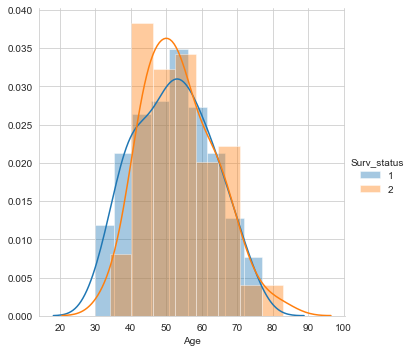

In [13]:
plt.close();
sns.FacetGrid(hbman,hue='Surv_status',height=5) \
    .map(sns.distplot,"Age") \
    .add_legend()
    
plt.show()

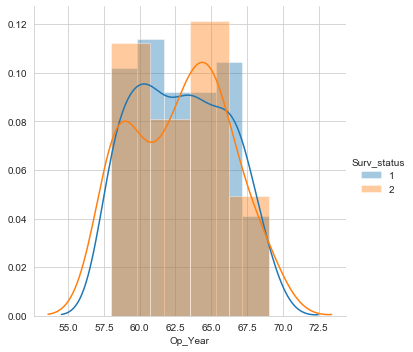

In [14]:
plt.close();
sns.FacetGrid(hbman,hue='Surv_status',height=5) \
    .map(sns.distplot,"Op_Year") \
    .add_legend()
    
plt.show()

In [16]:
hbman_lived = hbman.loc[hbman['Surv_status'] == 1 ]
hbman_died = hbman.loc[hbman['Surv_status'] == 2 ]

In [17]:
hbman_lived.describe()

,Age,Op_Year,axil_nodes,Surv_status
count,225.000000,225.000000,225.000000,225.0
mean,52.017778,62.862222,2.791111,1.0
std,11.012154,3.222915,5.870318,0.0
min,30.000000,58.000000,0.000000,1.0
25%,43.000000,60.000000,0.000000,1.0
50%,52.000000,63.000000,0.000000,1.0
75%,60.000000,66.000000,3.000000,1.0
max,77.000000,69.000000,46.000000,1.0


In [18]:
hbman_died.describe()

,Age,Op_Year,axil_nodes,Surv_status
count,81.000000,81.000000,81.000000,81.0
mean,53.679012,62.827160,7.456790,2.0
std,10.167137,3.342118,9.185654,0.0
min,34.000000,58.000000,0.000000,2.0
25%,46.000000,59.000000,1.000000,2.0
50%,53.000000,63.000000,4.000000,2.0
75%,61.000000,65.000000,11.000000,2.0
max,83.000000,69.000000,52.000000,2.0


Based on above two outputs we can get an trend that 75 % women that lived had less than 3 positive axillary nodes detected .
While women that died , 50% Women had more than 4 positive axillary nodes detected .

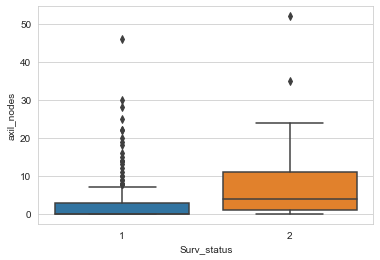

In [19]:
plt.close();
sns.boxplot(x='Surv_status',y='axil_nodes',data=hbman)
plt.show()

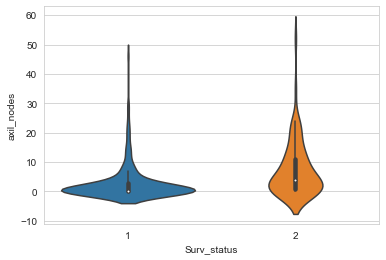

In [20]:
plt.close();
sns.violinplot(x='Surv_status',y='axil_nodes',data=hbman,height=8)
plt.show()

In [21]:
hbman_zero = hbman[hbman['axil_nodes'] == 0.0]

In [22]:
hbman_zero.describe()

,Age,Op_Year,axil_nodes,Surv_status
count,136.000000,136.000000,136.0,136.000000
mean,53.705882,63.102941,0.0,1.139706
std,11.247464,3.181612,0.0,0.347963
min,30.000000,58.000000,0.0,1.000000
25%,44.000000,60.000000,0.0,1.000000
50%,54.000000,63.000000,0.0,1.000000
75%,63.000000,66.000000,0.0,1.000000
max,76.000000,69.000000,0.0,2.000000


In [22]:
hbman_zero.describe()

,Age,Op_Year,axil_nodes,Surv_status
count,136.000000,136.000000,136.0,136.000000
mean,53.705882,63.102941,0.0,1.139706
std,11.247464,3.181612,0.0,0.347963
min,30.000000,58.000000,0.0,1.000000
25%,44.000000,60.000000,0.0,1.000000
50%,54.000000,63.000000,0.0,1.000000
75%,63.000000,66.000000,0.0,1.000000
max,76.000000,69.000000,0.0,2.000000


In [23]:
print(117/225)

0.52


[0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
[0.77124183 0.86928105 0.92810458 0.95424837 0.98366013 0.99019608
 0.99346405 0.99346405 0.99673203 1.        ]


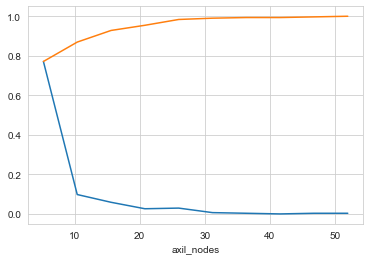

In [23]:
counts , bin_edges = np.histogram(hbman['axil_nodes'],bins=10,density = True)
pdf = counts/sum(counts)
print(pdf)
print(bin_edges)

plt.xlabel('axil_nodes')
cdf = np.cumsum(pdf)
print(cdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)